In [1]:
# mounting drive to colab that I have access to csv files stored in
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from html import unescape
import sklearn
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('/content/drive/My Drive/MIE1624_FINAL/sentiment_analysis.csv',encoding = "UTF-8")

In [4]:
df.shape

(550391, 3)

In [5]:
df[0:10]

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate...,1
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for ...,1
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making ...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorabl...",1


In [6]:
election = pd.read_csv('/content/drive/My Drive/MIE1624_FINAL/Canadian_elections_2021.csv',encoding = "UTF-8")

In [7]:
election

,text,sentiment,negative_reason
0,The Canadian election is a power grab by PM Tr...,negative,calling election early
1,I do hope Trudeau loses the Canadian election ...,negative,covid
2,"Dear Canadians, This election is a test of how...",positive,NaN
3,Canadian friends: Never forget that Trudeau ha...,negative,calling election early
4,Sorry @theJagmeetSingh I have voted #NDP all m...,positive,NaN
...,...,...,...
997,This is absolutely horrible in Canada. The for...,negative,others
998,@davidakin Trudeau imposes gun control policie...,negative,gun control
999,In Canada 🇨🇦 our election is being stolen by t...,negative,others
1000,"O'Toole amends platform on gun control, but qu...",negative,tell lies


# Part 1: Data cleaning

In [8]:
#define a function to remove all emojis
def delEmoji(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emotions
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [9]:
#Using NLTK library to download the stop words
nltk.download('stopwords')
english_stop_words=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#more data cleaning, except removing stop words, which will be implement later
def cleanTweet(text):
  text = re.sub(r'@[A-Za-z0-9]+:','',text) #remove @ mentions and ':'
  text = re.sub(r'#','',text) #remove the '#' symbol
  text = re.sub(r'RT[\s]+','',text) #remove RT
  text = delEmoji(text) #call the function to remove emojis
  text = re.sub(r'https?:\/\/\S+','',text) #remove hyper-link(URLs) 
  text = text.lower() #to convert all characters in the text to be in lowercase 
  text = re.sub(r'[^\w\s]','',text) #remove punctuations
  text = " ".join([word for word in text.split() if word not in english_stop_words]) #remove stop words
  return text


In [11]:
# clean the text data using function cleanTweet
df['text'] = df['text'].apply(cleanTweet)

**Print out the clean sentiment analysis data:**

In [12]:
df[0:10]

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,7.680980e+17,congratulations pakistan becoming no1testteam ...,1
2,7.680980e+17,september yesmag taking maine mendozas surpris...,1
3,7.680980e+17,david_gaibis newly painted walls thanks millio...,1
4,7.680980e+17,excited announce july 2017 feschotte lab reloc...,1
5,7.680980e+17,excited illuminate,1
6,7.680980e+17,firstdayofschool students amp teachers good lu...,1
7,7.680980e+17,srk kajol making ddlj song greatest ever,1
8,7.680980e+17,gayhopper_com im happy,1
9,7.680980e+17,kathryn daniel share memorable experience barc...,1


**Use the same pipeline for cleaning the dataset Candian_elections_2021.csv:**

In [13]:
election['text'] = election['text'].apply(cleanTweet)

Print out the clean canadian election 2021 data:

In [14]:
election

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes ta...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadians election test progressive wheth...,positive,NaN
3,canadian friends never forget trudeau 2 years ...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN
...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others
998,davidakin trudeau imposes gun control policies...,negative,gun control
999,canada election stolen thugs uneducated goons ...,negative,others
1000,otoole amends platform gun control questions r...,negative,tell lies


# Part 2: Exploratory analysis

Design a procedure that determines the political party (Liberal, Conservative,NDP, PPC) of all the tweets in the Canadian Elections dataset:

In [15]:
# make a copy of the clean election data
# use the copy to do Exploratory analysis
election1 = election.copy()
election1

,text,sentiment,negative_reason
0,canadian election power grab pm trudeau yes ta...,negative,calling election early
1,hope trudeau loses canadian election tomorrow ...,negative,covid
2,dear canadians election test progressive wheth...,positive,NaN
3,canadian friends never forget trudeau 2 years ...,negative,calling election early
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN
...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others
998,davidakin trudeau imposes gun control policies...,negative,gun control
999,canada election stolen thugs uneducated goons ...,negative,others
1000,otoole amends platform gun control questions r...,negative,tell lies


In [16]:
def party(tweet):
  #split each tweet by space, so we can have list of words for each tweet
  text = tweet.split(" ")
  #define which keywords indicate which party
  #keywords are based on name of party, color of party, and candidate's name of that party
  con_words = ['conservatives','erinotoole','erin','toole','conservative','voteconservative','cpc']
  lib_words = ['trudeau', 'justin', 'justintrudeau', 'liberal', 'liberals', 'liberalism', 'teamtrudeau', 'istandwithtrudeau', 'voteliberal']
  ndp_words = ['ndp','new democratic','jagmeet','singh','jagmeetsingh','democratic']
  ppc_words = ['maximebernier','maxime','bernier','ppc','purple']
  
  #Store parties that are mentioned in the tweets
  mentioned_parties = []
  
  #if found the party keywords in tweet, add the party to mentioned party list
  for word in text:
    if word in con_words:
      mentioned_parties.append('conservatives')
    if word in lib_words:
      mentioned_parties.append('liberal')
    if word in ndp_words:
      mentioned_parties.append('ndp')
    if word in ppc_words:
      mentioned_parties.append('ppc')
                
  #If there're multiple party mentioned in a tweet, we find the most common party mentioned 
  if len(mentioned_parties) > 1:
    most_common = max(set(mentioned_parties), key=mentioned_parties.count)
    mentioned_parties = []
    mentioned_parties.append(most_common) #store the most common one in the list

  # If nothing mentioned, we set it to none          
  elif len(mentioned_parties) == 0:
    mentioned_parties.append('none')
    
  return mentioned_parties[0] #return value of party

In [17]:
# apply the fuction "party" to determine the political party for canadian election 2021 dataset
election1['party'] = election1['text'].apply(party)

In [18]:
election1

,text,sentiment,negative_reason,party
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,liberal
1,hope trudeau loses canadian election tomorrow ...,negative,covid,liberal
2,dear canadians election test progressive wheth...,positive,NaN,none
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,liberal
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN,ppc
...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,none
998,davidakin trudeau imposes gun control policies...,negative,gun control,liberal
999,canada election stolen thugs uneducated goons ...,negative,others,none
1000,otoole amends platform gun control questions r...,negative,tell lies,none


In [19]:
# count the frequency of party
party_count = election1['party'].value_counts().sort_values()
party_count

ndp               33
ppc               61
conservatives    113
none             373
liberal          422
Name: party, dtype: int64

[]

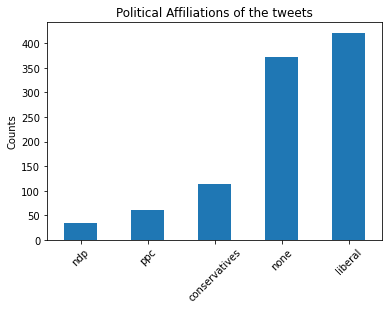

In [20]:
# barplot of the counts of each party
party_count.plot(kind = 'bar')
plt.title("Political Affiliations of the tweets")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.plot()

*Question: What can you say about the distribution of the political affiliations of the tweets?*

According to the bar plot above, we can see that the Liberal Party are the most common party that has been mentioned in tweets of canadian election 2021, which has a proportion around 42% among all tweets. The second most popular one is Conservative Party, with 113 tweets associate with it. This result is consistent with the actual results of election 2021, which Liberal party won the most seats and Conservatives party won the second most seats. However, the one that are mentioned the most in twitter does not neccenssarily mean that it has the most supporters, as public may have positive and negative sentiment about that party in their tweets. On the other hand, only 61 tweets talking about the PPC and 33 tweets talking about the NDP. So, we can conclude that these two parties didn't draw much attention from the public. And this is consistent with the actual election results that PPC and NDP won much less seats in 2021.

Visualization of the generic tweets in sentiment_analysis.csv:

In [21]:
# make a copy of the clean sentiment_analysis data
# use the copy to do Exploratory analysis
df1=df.copy()
df1

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,7.680980e+17,congratulations pakistan becoming no1testteam ...,1
2,7.680980e+17,september yesmag taking maine mendozas surpris...,1
3,7.680980e+17,david_gaibis newly painted walls thanks millio...,1
4,7.680980e+17,excited announce july 2017 feschotte lab reloc...,1
...,...,...,...
550386,8.046170e+17,goddesses_o cant stop watching hermm,0
550387,8.046180e+17,poor old tom odell doesnt look like would know...,0
550388,8.046180e+17,antsmasher smashed 7 ants awesome gamehjfjfi,1
550389,8.046180e+17,lizhudston kymwyllie evasmiless meanbok linddy...,1


In [22]:
#define another column containing the length of the tweets called length
df1['length'] = df1['text'].apply(len)
df1[0:10]

,ID,text,label,length
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1,60
1,7.680980e+17,congratulations pakistan becoming no1testteam ...,1,78
2,7.680980e+17,september yesmag taking maine mendozas surpris...,1,77
3,7.680980e+17,david_gaibis newly painted walls thanks millio...,1,98
4,7.680980e+17,excited announce july 2017 feschotte lab reloc...,1,63
5,7.680980e+17,excited illuminate,1,18
6,7.680980e+17,firstdayofschool students amp teachers good lu...,1,98
7,7.680980e+17,srk kajol making ddlj song greatest ever,1,40
8,7.680980e+17,gayhopper_com im happy,1,22
9,7.680980e+17,kathryn daniel share memorable experience barc...,1,65


In [23]:
# count the positive and negative sentiment in the dataset
# 0 = negative sentiment, 1 = positive sentiment
sentiment_count = df1['label'].value_counts()
sentiment_count

1    371341
0    179050
Name: label, dtype: int64

[]

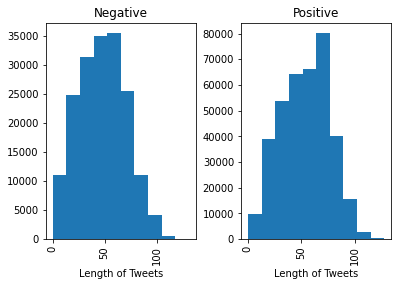

In [24]:
# plot the histograms of length split by the sentiment label
his=df1.hist('length',by='label')
his[0].set_title('Negative')
his[1].set_title('Positive')
his[0].set_xlabel('Length of Tweets')
his[1].set_xlabel('Length of Tweets')
plt.plot()

In [38]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 50, 
        scale = 3,
        random_state = 27
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

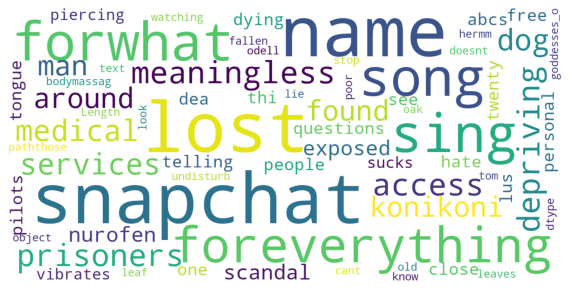

In [39]:
# print wordcloud of negative generic tweets
show_wordcloud(df1[df1['label'] == 0]["text"])

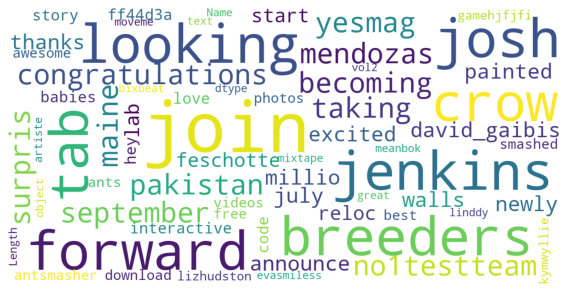

In [40]:
# print wordcloud of positive generic tweets
show_wordcloud(df1[df1['label'] == 1]["text"])

**Findings on Sentiment Analysis data:**



> *   After counting the number of negative and positive tweets, we find that there're 67.5% positive tweets and 32.5% negative tweets.
*   We also calculate the length of each tweet, and plot the histograms grouping by the type of sentiment. For positive tweets, text length between 60-70 seems to be the most frequent ones. For negative tweets, text length between 40-60 seems to be the most frequent ones. However, the ranges of text length are similar between positive and negative group.
*   Based on the wordcloud of negative generic tweets, we can see that popular words that have been used are "lost", "forwhat", "prisoners", "depriving", "scandal", and "meaningless." 
*  Based on the wordcloud of positive generic tweets, we can see that popular words that have been used are "join", "forward", "excited", and "congratulations".









Visualization of the generic tweets in 2021 Canadian Elections:

In [41]:
#define another column containing the length of the tweets called length
election1['length'] = election1['text'].apply(len)
election1[0:10]

,text,sentiment,negative_reason,party,length
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,liberal,202
1,hope trudeau loses canadian election tomorrow ...,negative,covid,liberal,216
2,dear canadians election test progressive wheth...,positive,NaN,none,201
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,liberal,204
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN,ppc,201
5,vaccines amp guns key election otoole serious ...,negative,covid,none,181
6,im sorry moderators respond leadership candida...,negative,others,none,204
7,say ive skeptical critical mainstream canadian...,negative,others,none,173
8,canadians voteppc support maximebernier would ...,positive,NaN,ppc,185
9,justin trudeau literally rocks thrown yet cont...,positive,NaN,liberal,194


In [42]:
# count the positive and negative sentiment in the dataset
election_sentiment_count = election1['sentiment'].value_counts()
election_sentiment_count

positive    615
negative    387
Name: sentiment, dtype: int64

[]

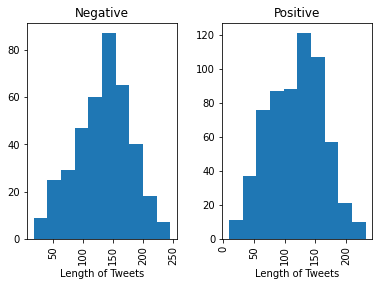

In [43]:
# plot the histograms of length split by the sentiment label
his=election1.hist('length',by='sentiment')
his[0].set_title('Negative')
his[1].set_title('Positive')
his[0].set_xlabel('Length of Tweets')
his[1].set_xlabel('Length of Tweets')
plt.plot()

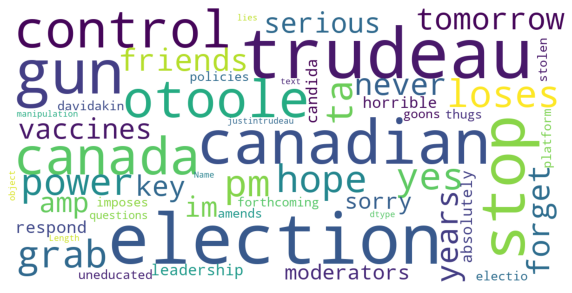

In [44]:
# print wordcloud of negative generic tweets
show_wordcloud(election1[election1['sentiment'] == 'negative']["text"])

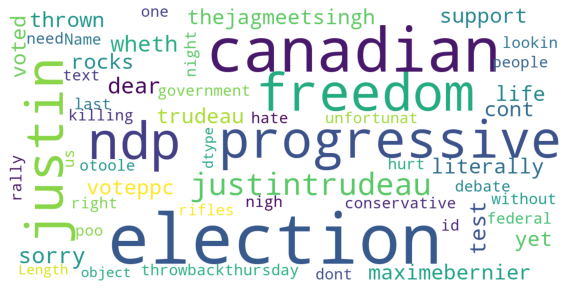

In [45]:
# print wordcloud of positive generic tweets
show_wordcloud(election1[election1['sentiment'] == 'positive']["text"])

**Findings on 2021 Canadian Elections tweets:**


> 

*   There're 615 out of 1002 positive tweets in the dataset, whereas there're only 387 negative tweets.
*   We also calculate the length of each tweet, and plot the histograms grouping by the type of sentiment. For positive tweets, text length between 150-160 seems to be the most frequent ones. For negative tweets, text length around 140 seems to be the most frequent ones. However, the ranges of text length are similar between positive and negative group.
*   Based on the wordcloud of negative generic tweets, we can see that popular words that have been used are "stop", "election", "gun", "loses", "stop", "control" and "serious". Moreover, we see words "trudeau" and "otoole", which represents the candidates of Liberal and Conservatives party respectively. So we know that there're many of the public having negative attitudes towards both two parties. We also see the words "vaccinces", we may deduced that some tweeets complaining the government and prime minister response to the pandemic in the aspect of vaccince.

*   Based on the wordcloud of positive generic tweets, we can see candidates' names and names of party are popular: "trudeau", "justintrudeau", "voteppc", "ndp" "jagmeetsingh", "maximebernier", "otoole". We could conclude that all 4 parties have significant supporters in the public, but the Liberal party and NDP seems to have more supporters since relevant words appear larger in the image. 




In [46]:
df

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,7.680980e+17,congratulations pakistan becoming no1testteam ...,1
2,7.680980e+17,september yesmag taking maine mendozas surpris...,1
3,7.680980e+17,david_gaibis newly painted walls thanks millio...,1
4,7.680980e+17,excited announce july 2017 feschotte lab reloc...,1
...,...,...,...
550386,8.046170e+17,goddesses_o cant stop watching hermm,0
550387,8.046180e+17,poor old tom odell doesnt look like would know...,0
550388,8.046180e+17,antsmasher smashed 7 ants awesome gamehjfjfi,1
550389,8.046180e+17,lizhudston kymwyllie evasmiless meanbok linddy...,1


In [47]:
election

,text,sentiment,negative_reason,label
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,0
2,dear canadians election test progressive wheth...,positive,NaN,1
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,0
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN,1
...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,0
998,davidakin trudeau imposes gun control policies...,negative,gun control,0
999,canada election stolen thugs uneducated goons ...,negative,others,0
1000,otoole amends platform gun control questions r...,negative,tell lies,0


# Part 3: Sentiment Classification

###a) Machine learning models:

In [25]:
# Split the sentiment analysis dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=27)

In [26]:
X_train

439125                     fresh market alicante big stinks
74804     astro_flow happy nationaldogday thanks jake sc...
29721             wow 1 million spotify views 2 weeks thank
59876           mt problem guns heart man 2a pjnet 2a pjnet
331127    fantastic ronanofficial tcworldwide gala dinne...
                                ...                        
285720    sanctuary best germany take note billdeblasio ...
357669        time4hiddles happy thomastuesday glorious day
196408    south carolinas malik young thankful first sta...
539167    dirty bitch riding huge cock video nsfw cockri...
380600    girls help stay sane im lucky girl world call ...
Name: text, Length: 440312, dtype: object

**Prepare the data using TF-IDF:**

In [27]:
# initialize vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word', max_features = 5000)

In [28]:
# X_train fit transform
X_train_counts = vectorizer.fit_transform(X_train)

In [29]:
# transform X_test
X_test_counts = vectorizer.transform(X_test)

In [30]:
# transform counts matrix to tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

#####**1.  Logistic Regression:**






In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
# Logistic regression
lr_tf = LogisticRegression(random_state=27).fit(X_train_tfidf, y_train) #fit model on training set
prediction1 = lr_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for Logistic Regression on tf-idf is: ', accuracy_score(y_test, prediction1)) #compute accuracy

Accuracy for Logistic Regression on tf-idf is:  0.9642166080723844


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In summary, accuracy for Logistic Regression on TF-IDF data is 96.42%.

#####**2.   k-NN:**






In [43]:
from sklearn.neighbors import KNeighborsClassifier
# KNN
knn_tf = KNeighborsClassifier(n_neighbors = 5)
knn_tf.fit(X_train_tfidf, y_train) #fit model on training set
prediction2 = knn_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for KNN on tf-idf is: ', accuracy_score(y_test, prediction2)) #compute accuracy

Accuracy for KNN on tf-idf is:  0.8170223203335786


In summary, accuracy for k-NN on TF-IDF data is 81.70%.

#####**3.   Naive Bayes:**






In [44]:
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes
nb_tf = MultinomialNB()
nb_tf.fit(X_train_tfidf, y_train) #fit model on training set
prediction3 = nb_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for Naive Bayes on tf-idf is: ', accuracy_score(y_test, prediction3)) #compute accuracy

Accuracy for Naive Bayes on tf-idf is:  0.930077489802778


In summary, accuracy for Naive Bayes on TF-IDF data is 93.01%.

#####**4.  SVM:**






In [33]:
from sklearn.svm import LinearSVC
# SVM
svm_tf = LinearSVC(random_state=27, tol=1e-5) 
svm_tf.fit(X_train_tfidf, y_train) #fit model on training set
prediction4 = svm_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for SVM on tf-idf is: ', accuracy_score(y_test, prediction4)) #compute accuracy

Accuracy for SVM on tf-idf is:  0.9644164645391037


In summary, accuracy for SVM on TF-IDF data is 96.44%.

#####**5.  Decision Trees:**






In [46]:
from sklearn.tree import DecisionTreeClassifier
# decision trees
dec_tf = DecisionTreeClassifier(random_state=27)
dec_tf.fit(X_train_tfidf, y_train) #fit model on training set
prediction5 = dec_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for Decision Trees on tfidf is: ', accuracy_score(y_test, prediction5)) #compute accuracy

Accuracy for Decision Trees on tfidf is:  0.9410514267026409


In summary, accuracy for Decision Trees on TF-IDF data is 94.11%.

#####**6.  Random Forest:**






In [47]:
from sklearn.ensemble import RandomForestClassifier
# Random forest
rf_tf = RandomForestClassifier(max_depth=50, random_state=27)
rf_tf.fit(X_train_tfidf, y_train) #fit model on training set
prediction6 = rf_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for Random forest on tf-idf is: ',accuracy_score(y_test, prediction6)) #compute accuracy

Accuracy for Random forest on tf-idf is:  0.8432307706283669


In summary, accuracy for Random Forest on TF-IDF data is 84.32%.

#####**7.  XGBoost:**






In [48]:
from sklearn.ensemble import GradientBoostingClassifier
# XGBoost
gb_tf = GradientBoostingClassifier(random_state=27)
gb_tf.fit(X_train_tfidf, y_train) #fit model on training set
prediction7 = gb_tf.predict(X_test_tfidf) #make predictions on test set
print('Accuracy for XGBoost on tf-idf is: ',accuracy_score(y_test, prediction7)) #compute accuracy

Accuracy for XGBoost on tf-idf is:  0.8056850080396806


In summary, accuracy for XGBoost on TF-IDF data is 80.57%.

###b) Deep Learning:

In [49]:
# Split the data into training, validation, and test set
from sklearn.model_selection import train_test_split
Xd_train, Xd_test, yd_train, yd_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=27)
Xd_train, Xd_val, yd_train, yd_val = train_test_split(Xd_train, yd_train, test_size=0.25, random_state=27)

In [50]:
Xd_train

256436    official gluten free twitter account likes ur ...
309435    found transponder snailgiants sea monsters ama...
124675    learn yesterday live today hope tomorrow quote...
223857           tried send hillary clinton hasnt responded
170070    venice lagoons inspired beautiful tasty foodst...
                                ...                        
134506    team making welcome home baskets passagehome c...
177473    u completely misread situation realize ur over...
135793    bts wings concept photos 1amp2 soooo excited l...
100193    corrupted cynder custom plush share hugely app...
264997                  realskipbayless dream capt clueless
Name: text, Length: 330234, dtype: object

In [51]:
Xd_val

294924    big bad list 100 free seo tools every challeng...
274570                                                  sad
512958                         jerk right ratemyass sexyass
517983    much see king sgtevillage despite building wor...
110145    fun games startup land user needs everything w...
                                ...                        
175554             happy 17th bday mayor boise love old man
145464    jdubbz118 brought nice drink drink energy ener...
200088             happy birthday chloecresswelll great day
420451    reindeer hot dogs recipe kitchenfun3sons kids ...
93555       love arewe love youmainedcm aldublolasinconcert
Name: text, Length: 110078, dtype: object

In [52]:
Xd_test

369836                         dckeller10 please read thank
293277    sexy funcute visit cam sign easy free porn nsf...
292407    boyfriend trying get eat im strict diet bc ill...
416509                nowadays bring sinkie zar boh go date
81218     dear lt woz looking like sweet papa bear prowl...
                                ...                        
6597      beautiful fe art nemupon find many across seri...
17353     cu_takethewheel 1carries first 6 albums debute...
246950       thank veterans heard_magnet salutes weareheard
364563    cnn commentators clash trump racism trump vide...
42097                                             look good
Name: text, Length: 110079, dtype: object

In [53]:
# Prepare the data using Bag of Words (word frequency)
X_train_bow = vectorizer.fit_transform(Xd_train)
X_val_bow = vectorizer.transform(Xd_val)
X_test_bow = vectorizer.transform(Xd_test)

**Train a deep learning model(MLP) to perform the sentiment classification task:** A multilayer perceptron (MLP) is a fully connected class of feedforward artificial neural network (ANN).

In [54]:
# fit multi-layer perceptron model
clf = MLPClassifier(random_state=27,learning_rate_init=0.01).fit(X_train_bow, yd_train) #in order to prevent very slow running time, we make learning rate=0.01

In [55]:
# Calculate accuracy on validation set
clf.score(X_val_bow, yd_val)

0.9586747578989444

**Select 2 Hyper-parameters for tunning using Grid search:**

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

Learning rate is a very importat hyperparameter in our probelm as MLP classifier optimizes the loss function using gradient descent. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs. A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck. So, here I try different values of learning rate to find the best model.<br />
Also, I try different activation functions for the hidden layer to find the one that has the highest accuracy.

In [ ]:
#tunning activation function for the hidden layer
#tunning the initial learning rate used
params = {'activation': ['relu', 'logistic'], 'learning_rate_init': [0.01, 0.1]}

mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=27), param_grid=params, cv=3)
mlp_classif_grid.fit(X_train_bow, yd_train)

print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train_bow, yd_train))
print('Validation Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_val_bow,yd_val))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

Train Accuracy : 0.964
Validation Accuracy : 0.959
Best Accuracy Through Grid Search : 0.960
Best Parameters :  {'activation': 'relu', 'learning_rate_init': 0.1}


**Evaluate the best model on the test data to obtain an accuracy value:**

In [ ]:
#use the best model to make predictions about test data
prediction8 = mlp_classif_grid.best_estimator_.predict(X_test_bow)
#calculate accuracy score on the testset
accuracy_score(yd_test, prediction8)

0.9579211293707247

### c) Evaluate the trained model with the best performance on the Canadian Elections data:

Based on the accuracy scores of 7 machine learning model and 1 deep learning model, we learn that the **SVM model performs the best, with accuracy of 96.44%.** Thus, we use this trained model to predict and evaluate the performance on the canadian elections data.

In [34]:
# convert sentiment to numerical values, 1=positive and 0=negative
election['label'] = election['sentiment'].map(lambda x: 1 if x=="positive" else 0)

In [35]:
election

,text,sentiment,negative_reason,label
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,0
1,hope trudeau loses canadian election tomorrow ...,negative,covid,0
2,dear canadians election test progressive wheth...,positive,NaN,1
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,0
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN,1
...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,0
998,davidakin trudeau imposes gun control policies...,negative,gun control,0
999,canada election stolen thugs uneducated goons ...,negative,others,0
1000,otoole amends platform gun control questions r...,negative,tell lies,0


In [36]:
# transform election data to TF-IDF
election_counts = vectorizer.transform(election['text'])
election_tfidf = tfidf_transformer.transform(election_counts)

In [37]:
#make predictions on the canadian election data using the best trained model
predict_election = svm_tf.predict(election_tfidf) 
print('Accuracy for SVM on election data is: ', accuracy_score(election['label'], predict_election)) #compute accuracy

Accuracy for SVM on election data is:  0.7245508982035929


**Key Findings:**<br /> Based on the results above, **using trained SVM model, the accuracy on the canadian elections data is 72.455%.** This means that about 72.5% of tweets in the dataset are correctly labelled in terms of sentiment. Accuray on canadian election data is much lower than the accuracy of 96.44% that SVM performed on the testset of sentiment analysis data. We may consider this results as an indication of overfitting as the error on the training data(sentiment analysis) is much smaller than the error on the test data(canadian election 2021). The trained SVM model takes the form of making an overly complex model leading to reduce of predictive power. When test this model on an unseen data(canadian election 2021), overfitting making it unable to generalize well and thus producing inacurrate predictions.

###d) Propose two other evaluation metrics:

1.  One possible metric is AUC, AUC_ROC indicates how well the probabilities from the positive classes are separated from the negative classes.In our case, it can measure model's ability to distinguish between positive and negative sentiment in tweets.
2.  Another possible metric for evaluation is f1 score. It can be interpreted as a harmonic mean of the precision and recall and the relative contribution of precision and recall to the f1 score are equal. It take into account class imbalance, which is suitable in our case as there're much more data with positive class than negative class.

###e) Visualize the sentiment predictions and true values for each of the 4 parties:

In [48]:
# copy the election dataset with party label obtained in part 2
election2 = election1.copy()
election2

,text,sentiment,negative_reason,party,length
0,canadian election power grab pm trudeau yes ta...,negative,calling election early,liberal,202
1,hope trudeau loses canadian election tomorrow ...,negative,covid,liberal,216
2,dear canadians election test progressive wheth...,positive,NaN,none,201
3,canadian friends never forget trudeau 2 years ...,negative,calling election early,liberal,204
4,sorry thejagmeetsingh voted ndp life election ...,positive,NaN,ppc,201
...,...,...,...,...,...
997,absolutely horrible canada forthcoming electio...,negative,others,none,173
998,davidakin trudeau imposes gun control policies...,negative,gun control,liberal,158
999,canada election stolen thugs uneducated goons ...,negative,others,none,154
1000,otoole amends platform gun control questions r...,negative,tell lies,none,165


In [49]:
# only keep the columns sentiment, party, and prediction
election2=election2.drop(['text', 'negative_reason','length'], axis=1)

In [50]:
election2['prediction']=predict_election
election2[0:20]

,sentiment,party,prediction
0,negative,liberal,0
1,negative,liberal,0
2,positive,none,0
3,negative,liberal,0
4,positive,ppc,0
5,negative,none,0
6,negative,none,0
7,negative,none,0
8,positive,ppc,1
9,positive,liberal,0


In [51]:
# count the frequency of party labels
election2['party'].value_counts()

liberal          422
none             373
conservatives    113
ppc               61
ndp               33
Name: party, dtype: int64

In [52]:
# exclude the data which does not have a party label
four_party = election2.loc[election2['party'] != 'none']
four_party

,sentiment,party,prediction
0,negative,liberal,0
1,negative,liberal,0
3,negative,liberal,0
4,positive,ppc,0
8,positive,ppc,1
...,...,...,...
991,negative,liberal,0
992,negative,liberal,0
995,negative,liberal,0
998,negative,liberal,0


In [53]:
# convert sentiment to numerical values, 1=positive and 0=negative
four_party['label'] = four_party['sentiment'].map(lambda x: 1 if x=="positive" else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
four_party

,sentiment,party,prediction,label
0,negative,liberal,0,0
1,negative,liberal,0,0
3,negative,liberal,0,0
4,positive,ppc,0,1
8,positive,ppc,1,1
...,...,...,...,...
991,negative,liberal,0,0
992,negative,liberal,0,0
995,negative,liberal,0,0
998,negative,liberal,0,0


Please note that the column "label" contains the true sentiment values, and the column "prediction" contains the predicted values using trained SVM model obtained from the last part. Now, let's visualize the sentiment prediction results and the true sentiment for each of the 4 parties.

1) Liberal Party:

In [56]:
liberal=four_party.loc[four_party['party'] == 'liberal']
liberal

,sentiment,party,prediction,label
0,negative,liberal,0,0
1,negative,liberal,0,0
3,negative,liberal,0,0
9,positive,liberal,0,1
14,positive,liberal,1,1
...,...,...,...,...
991,negative,liberal,0,0
992,negative,liberal,0,0
995,negative,liberal,0,0
998,negative,liberal,0,0


In [57]:
# compute the accuracy score
acc_liberal = accuracy_score(liberal['label'],liberal['prediction'])
print("The accuracy of Liberal Party is {}%".format(round(acc_liberal*100,2)))

The accuracy of Liberal Party is 69.91%


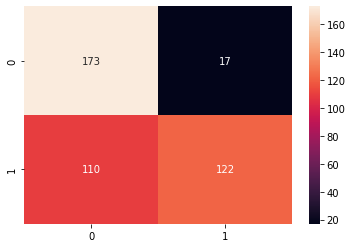

In [58]:
# compute confusion matrix
cm_lib = sklearn.metrics.confusion_matrix(liberal['label'],liberal['prediction'])
sns.heatmap(cm_lib,annot=True,fmt='d')
plt.show()

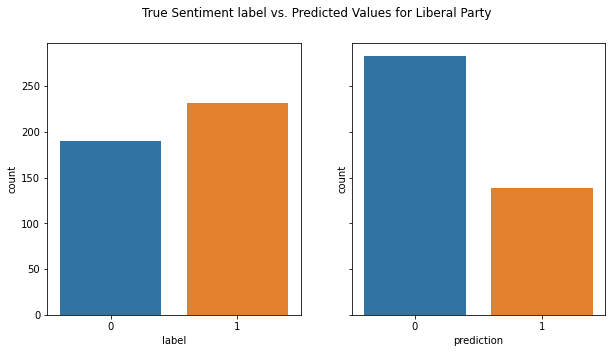

In [59]:
# bar plot for counts of true values and predicted values
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(10,5))
fig.suptitle('True Sentiment label vs. Predicted Values for Liberal Party')

sns.countplot(x='label', data=liberal, ax=ax1)
sns.countplot(x='prediction', data=liberal,ax=ax2)

2）Conservative Party:

In [60]:
conservative=four_party.loc[four_party['party'] == 'conservatives']
conservative

,sentiment,party,prediction,label
15,positive,conservatives,1,1
23,positive,conservatives,1,1
24,negative,conservatives,0,0
26,negative,conservatives,0,0
36,negative,conservatives,0,0
...,...,...,...,...
953,negative,conservatives,0,0
968,negative,conservatives,0,0
975,negative,conservatives,0,0
989,negative,conservatives,0,0


In [61]:
# compute the accuracy score
acc_conservative = accuracy_score(conservative['label'],conservative['prediction'])
print("The accuracy of Conservative Party is {}%".format(round(acc_conservative*100,2)))

The accuracy of Conservative Party is 70.8%


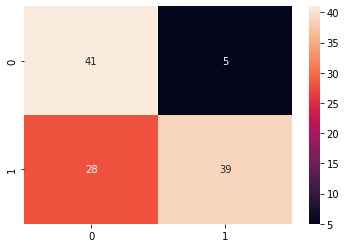

In [62]:
# compute confusion matrix
cm_con = sklearn.metrics.confusion_matrix(conservative['label'],conservative['prediction'])
sns.heatmap(cm_con,annot=True,fmt='d')
plt.show()

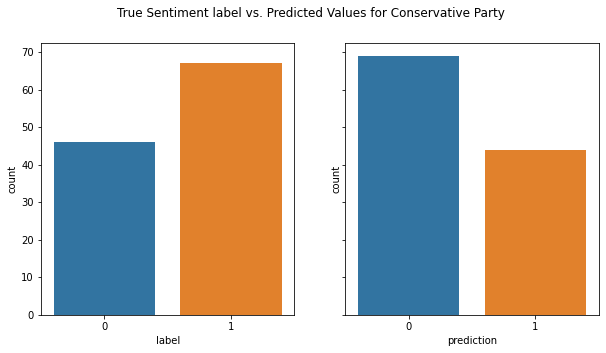

In [63]:
# bar plot for counts of true values and predicted values
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(10,5))
fig.suptitle('True Sentiment label vs. Predicted Values for Conservative Party')

sns.countplot(x='label', data=conservative, ax=ax1)
sns.countplot(x='prediction', data=conservative,ax=ax2)

3) NDP:

In [64]:
ndp=four_party.loc[four_party['party'] == 'ndp']
ndp.shape

(33, 4)

In [65]:
# compute the accuracy score
acc_ndp = accuracy_score(ndp['label'],ndp['prediction'])
print("The accuracy of NDP is {}%".format(round(acc_ndp*100,2)))

The accuracy of NDP is 66.67%


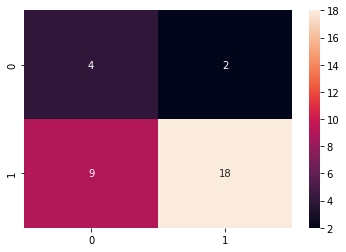

In [66]:
# compute confusion matrix
cm_ndp = sklearn.metrics.confusion_matrix(ndp['label'],ndp['prediction'])
sns.heatmap(cm_ndp,annot=True,fmt='d')
plt.show()

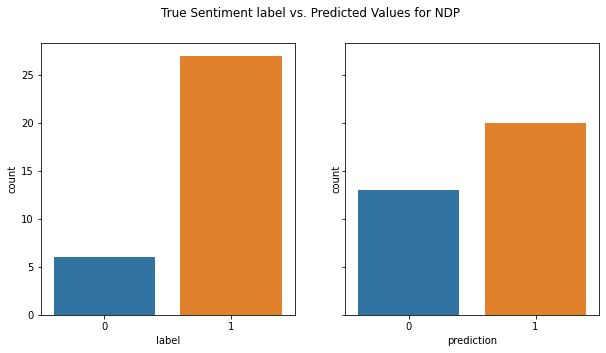

In [67]:
# bar plot for counts of true values and predicted values
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(10,5))
fig.suptitle('True Sentiment label vs. Predicted Values for NDP')

sns.countplot(x='label', data=ndp, ax=ax1)
sns.countplot(x='prediction', data=ndp,ax=ax2)

4) PPC:

In [68]:
ppc=four_party.loc[four_party['party'] == 'ppc']
ppc.shape

(61, 4)

In [69]:
# compute the accuracy score
acc_ppc = accuracy_score(ppc['label'],ppc['prediction'])
print("The accuracy of PPC is {}%".format(round(acc_ppc*100,2)))

The accuracy of PPC is 62.3%


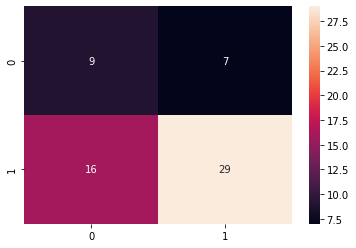

In [70]:
# compute confusion matrix
cm_ppc = sklearn.metrics.confusion_matrix(ppc['label'],ppc['prediction'])
sns.heatmap(cm_ppc,annot=True,fmt='d')
plt.show()

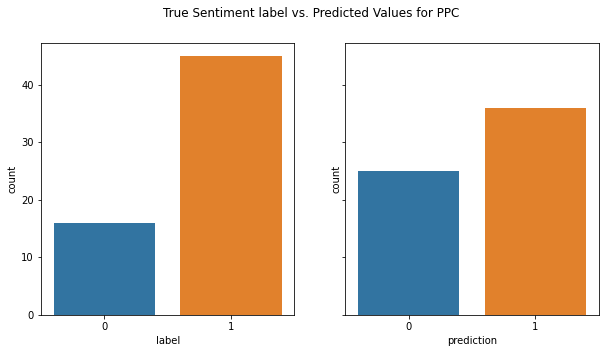

In [71]:
# bar plot for counts of true values and predicted values
fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(10,5))
fig.suptitle('True Sentiment label vs. Predicted Values for PPC')

sns.countplot(x='label', data=ppc, ax=ax1)
sns.countplot(x='prediction', data=ppc,ax=ax2)

**Key results:**
1. SVM model that was trained on TF-IDF data with is applied to canadian election tweets data.
2. For Liberal party, the accuracy of SVM model is 69.91%. According to the confusion matrix, we see that the most common error is False Negative,  meaning that the model wrongly classifies 110 tweets as negative generic when the true sentiment is actually positive. This can be visualized in the bar plot where there're much fewer tweets being classified as positive sentiment compared to the true labels. In the predictions, we see that there're more criticizers towards the liberal party compared to the number of supporters. However, in reality, there're more supporters than opponents.
3. For conservative party, the accuracy of SVM model is 70.8%. According to the confusion matrix, we see that the most common error is False Negative, meaning that the model wrongly classifies 28 out of 113 tweets as negative generic when the true sentiment is actually positive. This can be visualized in the bar plot where positive sentiment are underestimated and negative sentiment are overestimated compared to the true labels.
4. For NDP, the accuracy of SVM model is 66.67%. According to the confusion matrix, we see that the most common error is False Negative as well, meaning that the model wrongly classifies 9 out of 33 tweets as negative generic when the true sentiment is actually positive. This can be visualized in the bar plot where positive sentiment are underestimated and negative sentiment are overestimated compared to the true labels.
5. Similarly, for PPC, the accuracy of SVM model is 62.3%. According to the confusion matrix, we see that the most common error is False Negative as well,  meaning that the model wrongly classifies 16 out of 61 tweets as negative generic when the true sentiment is actually positive. This can be visualized in the bar plot where positive sentiment are underestimated and negative sentiment are overestimated compared to the true labels.
6. Overall, results in all 4 parties leading to a same conclusion: in our trained SVM model, positive sentiment are underestimated and negative sentiment are overestimated compared to the true labels. The model's limited performance indicates that **political parties should not entirely trust** such form of analytics. However, our model still could provide predictions on tweets with an accuracy score of 60-70%. More importantly, the false negative error is not a very serious problem in the case of election. In fact, it has positive effect on the election campaign, because overestimated negative sentiment from the public will prevent the parties being overly optimistics about their votes which will in turn make them put more efforts into the campaign in order to gain more reputation among the public.
7. One way to improve the accuracy of the model is to perform hyperparameter tunning using grid search in the validation process. The wrong hyperparameters setting will make our estimated model parameters produce suboptimal results, as they don't minimize the loss function. This means that our model makes more errors and reduce the accuracy. So, I suggest that we should try different values of 2 or more hyperparameter on the SVM, such as "penalty" and regularization hyperparameter "C" to find the best result.

#Part 4: Negative Reason Classification

In [72]:
# create a dataframe that only contains negative sentiment data
negative=election.loc[election['sentiment']=='negative']
# reset index
negative=negative.reset_index(drop=True)
# drop the irrelevant columns
negative=negative.drop(['sentiment','label'], axis=1)

In [73]:
#convert 'negative_reason' column to numeric
negative['reason'] = pd.factorize(negative['negative_reason'])[0]
negative

,text,negative_reason,reason
0,canadian election power grab pm trudeau yes ta...,calling election early,0
1,hope trudeau loses canadian election tomorrow ...,covid,1
2,canadian friends never forget trudeau 2 years ...,calling election early,0
3,vaccines amp guns key election otoole serious ...,covid,1
4,im sorry moderators respond leadership candida...,others,2
...,...,...,...
382,absolutely horrible canada forthcoming electio...,others,2
383,davidakin trudeau imposes gun control policies...,gun control,5
384,canada election stolen thugs uneducated goons ...,others,2
385,otoole amends platform gun control questions r...,tell lies,4


In [74]:
negative['reason'].value_counts()

2     149
0      73
4      61
1      25
6      20
5      16
10     15
3      14
7       7
9       4
8       3
Name: reason, dtype: int64

In [75]:
negative['negative_reason'].value_counts()

others                                 149
calling election early                  73
tell lies                               61
covid                                   25
economy                                 20
gun control                             16
climate problem                         15
scandal                                 14
healthcare and marijuana                 7
women reproductive right and racism      4
segregation                              3
Name: negative_reason, dtype: int64

Since the negative_reason variable has been tranform to the numerical variable(column "reason", with values= 0 to 10), we can now drop the orginal negative_reason column.

In [76]:
negative=negative.drop(['negative_reason'], axis=1)
negative

,text,reason
0,canadian election power grab pm trudeau yes ta...,0
1,hope trudeau loses canadian election tomorrow ...,1
2,canadian friends never forget trudeau 2 years ...,0
3,vaccines amp guns key election otoole serious ...,1
4,im sorry moderators respond leadership candida...,2
...,...,...
382,absolutely horrible canada forthcoming electio...,2
383,davidakin trudeau imposes gun control policies...,5
384,canada election stolen thugs uneducated goons ...,2
385,otoole amends platform gun control questions r...,4


In [77]:
# Split tweets into training data (70%) and test data (30%)
Xneg_train, Xneg_test, yneg_train, yneg_test = train_test_split(negative['text'], negative['reason'], test_size=0.3, random_state=27)

In [97]:
Xneg_test

29     cpc erin otoole lying pos baldfaced lied 11 ye...
21     friends alberta please advised effing pissed i...
255    joke wait till election remember spent 600 mil...
132    annieclairebo otoole yankee overlords telling ...
156    bullshit otoole party received endorsement can...
                             ...                        
97     many jobs election create dont cons love jobs ...
76     justintrudeau could 6 years ago didnt got hand...
211    time prime minister election canada damn long ...
10     fellow canadians appears ridings free country ...
362    whiff strike two trudeau fails arguing otoole ...
Name: text, Length: 117, dtype: object

Prepare the data using Bag of Words (word frequency):

In [79]:
Xneg_train_bow = vectorizer.fit_transform(Xneg_train)
Xneg_test_bow = vectorizer.transform(Xneg_test)

In [80]:
# fit multi-layer perceptron model
clf_neg = MLPClassifier(random_state=27).fit(Xneg_train_bow, yneg_train)

In [81]:
# Calculate accuracy on training set
clf_neg.score(Xneg_train_bow, yneg_train)

1.0

**Hidden_layer_sizes** : This hyperparameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.So here, I try two different values, one has 3 hidden layers with number of nodes equals 200, 150, and 50 in each hidden layer. Another has 4 hidden layers, with number of nodes equals 100, 50, 30, and 10 in each hidden layer.<br />
**Learning rate** is also an important hyperparameter for MLP as it controls how much we are adjusting the weights of our network with respect the loss gradient. So, 3 different initial learning rate values are listed below for the tunning process.

In [88]:
#tunning hidden layer sizes
#tunning the initial learning rate used
params = {'hidden_layer_sizes': [(128, 64, 32),(64, 48, 32, 10)], 'learning_rate_init': [0.001, 0.01, 0.2]}

mlp_neg_grid = GridSearchCV(MLPClassifier(random_state=27), param_grid=params, cv=3)
mlp_neg_grid.fit(Xneg_train_bow, yneg_train)

print('Train Accuracy : %.3f'%mlp_neg_grid.best_estimator_.score(Xneg_train_bow, yneg_train))
print('Best Accuracy Through Grid Search : %.3f'%mlp_neg_grid.best_score_)
print('Best Parameters : ',mlp_neg_grid.best_params_)

Train Accuracy : 1.000
Best Accuracy Through Grid Search : 0.452
Best Parameters :  {'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001}


In [89]:
#use the best model to make predictions about test data
prediction_neg = mlp_neg_grid.best_estimator_.predict(Xneg_test_bow)
#calculate accuracy score on the testset
accuracy_score(yneg_test, prediction_neg)

0.4700854700854701

In [102]:
# combine the true values and predicted values in the test data
reason = {'True_num':yneg_test, 'Predicted_num': prediction_neg}
result_neg=pd.DataFrame(data=reason)
result_neg

,True_num,Predicted_num
29,4,2
21,2,2
255,6,6
132,2,2
156,5,2
...,...,...
97,2,2
76,1,0
211,0,2
10,4,4


In [104]:
#map the numerical classes back to the original categorical classes using dictionary
dic_reason = {0: "calling election early", 1: "covid", 2: "others", 3: "scandal", 4: "tell lies", 5: "gun control", 6: "economy", 7: "healthcare and marijuana", 8: "segregation", 9: "women reproductive right and racism", 10: "climate problem"}
result_neg["True"] = result_neg["True_num"].map(dic_reason)
result_neg["Predicted"] = result_neg["Predicted_num"].map(dic_reason)

In [105]:
result_neg

,True_num,Predicted_num,True,Predicted
29,4,2,tell lies,others
21,2,2,others,others
255,6,6,economy,economy
132,2,2,others,others
156,5,2,gun control,others
...,...,...,...,...
97,2,2,others,others
76,1,0,covid,calling election early
211,0,2,calling election early,others
10,4,4,tell lies,tell lies


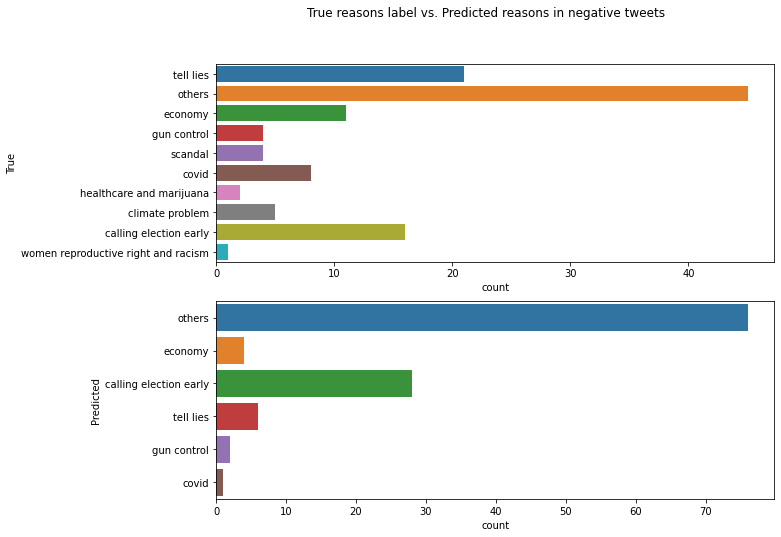

In [107]:
# bar plot for counts of true reasons and predicted reasons on test data
fig, (ax1, ax2) = plt.subplots(2,1,sharey=False, figsize=(10,8))
fig.suptitle('True reasons label vs. Predicted reasons in negative tweets')

sns.countplot(y='True', data=result_neg, ax=ax1)
sns.countplot(y='Predicted', data=result_neg, ax=ax2)

According to the accuracy, MLP model performs poorly on the test data with a score of **47%**. <br />**Why model fails?**

1. **Lack of training data/samll training size.** This problem is immediately noticed during splitting data. There are only 387 negative sentiments tweets, splitting the data into train, validation and test set leaves the model only 270 rows to train on. There isn't a hard standard on how much data is enough for machine learning but 270 samples is definitely on the lacking side.

2. **Dataset is very skewed.** For example, there are 149 samples with 'Others' as negative reason while there are only 3 samples in 'segregation' class and 4 samples in 'women reproductive right and racism' class. The model does not have much exposure/information to such kind of tweets and therefore can be weak when predicting targets from such category. Based on the bar plot above, we can see that our model failed to predict those minority class, such as classes "scandal", "climate problem" and "women reproductive right and racism", and biased on the majority class, such as "Others", "calling election early".

**One way you can improve the accuracy of selected model**:<br />  Try to gather more data for negative reasons, making the sample size larger. Also, dealing with the imbalanced-class problem: Collect more data on the minority reason class, such as "scandal", "climate problem" and "women reproductive right and racism", or try to combine those minority classes for making it as a majority class